In [130]:
from __future__ import division
import pandas as pd
import numpy as np
from patsy import dmatrices
pd.options.mode.chained_assignment = None
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.cross_validation import cross_val_score, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [131]:
df = pd.DataFrame(pickle.load(open('../data_files/clean_recent_data.pkl', 'rb')))
print "Done reading dataframe"

Done reading dataframe


In [132]:
mdf.total_price_including_optional_support = mdf.total_price_including_optional_support.map(lambda x: np.log(x))

In [133]:
mdf.students_reached = mdf.students_reached.map(lambda x: np.sqrt(x))

In [134]:
mdf = df[['primary_focus_area', 'primary_focus_subject','quarter', 'grade_level', 'resource_type', 'RESP', 'teacher_previous_projects', 'school_previous_projects', 'total_price_including_optional_support', 'students_reached']]
print len(mdf)

233723


In [135]:
mdf = mdf.dropna(axis=0)
print len(mdf)

233687


In [136]:
gX = mdf[['teacher_previous_projects', 'school_previous_projects', 'total_price_including_optional_support', 'students_reached']]
gy = mdf[['RESP']]

gy = np.ravel(gy)

std_scale = preprocessing.StandardScaler().fit(gX)
gX = std_scale.transform(gX)
print len(gX)
print "Done scaling Gaussian"

233687
Done scaling Gaussian


In [137]:
mX = pd.get_dummies(mdf[['primary_focus_area', 'primary_focus_subject','quarter', 'grade_level', 'resource_type']], dummy_na=True)
my = mdf[['RESP']]

my = np.ravel(my)

mX = preprocessing.normalize(mX)
print len(mX)
print "Done scaling Multinomial"

233687
Done scaling Multinomial


In [138]:
new_gX = mdf[['teacher_previous_projects', 'school_previous_projects', 'total_price_including_optional_support', 'students_reached']]
new_mX = pd.get_dummies(mdf[['primary_focus_area', 'primary_focus_subject','quarter', 'grade_level', 'resource_type']], dummy_na=True)
new_my = mdf[['RESP']]
new_df = pd.merge(new_gX, new_mX, left_index = True, right_index = True)
new_df = pd.merge(new_df, new_my, left_index = True, right_index = True)
print len(new_df)

233687


In [139]:
def test_model(name, main_model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7)
    print "done splitting"
    model = main_model
    model = model.fit(x_train, y_train)
    print "done fitting %s model" % name
    score = model.predict_proba(X)
    new_score = score[:,1]
    new_df[name] = new_score
    return new_df

In [140]:
test_model("GaussianNB", GaussianNB(), gX, gy)
test_model("MultinomialNB", MultinomialNB(), mX, my)

done splitting
done fitting GaussianNB model
done splitting
done fitting MultinomialNB model


,teacher_previous_projects,school_previous_projects,total_price_including_optional_support,students_reached,quarter,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,...,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,resource_type_nan,RESP,GaussianNB,MultinomialNB
619327,0,0,309.25,75,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0.832588,0.711076
619328,0,0,193.49,4,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.829139,0.734843
619329,0,0,607.27,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0.833939,0.715496
619330,0,0,912.32,23,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.823900,0.715496
619331,0,0,344.01,21,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0.833459,0.717821
619332,0,0,289.19,30,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0.832500,0.744053
619333,0,0,637.82,18,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0.833261,0.747413
619334,0,0,221.74,30,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0.830659,0.719231
619335,0,0,296.71,17,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0.832455,0.669882
619336,0,0,179.80,22,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0.829115,0.714219


In [109]:
new_df

,teacher_previous_projects,school_previous_projects,total_price_including_optional_support,students_reached,quarter,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,...,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,resource_type_nan,RESP,GaussianNB,MultinomialNB
619327,0,0,309.25,75,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0.832588,0.711076
619328,0,0,193.49,4,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.829139,0.734843
619329,0,0,607.27,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0.833939,0.715496
619330,0,0,912.32,23,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.823900,0.715496
619331,0,0,344.01,21,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0.833459,0.717821
619332,0,0,289.19,30,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0.832500,0.744053
619333,0,0,637.82,18,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0.833261,0.747413
619334,0,0,221.74,30,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0.830659,0.719231
619335,0,0,296.71,17,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0.832455,0.669882
619336,0,0,179.80,22,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0.829115,0.714219


In [111]:
% matplotlib inline

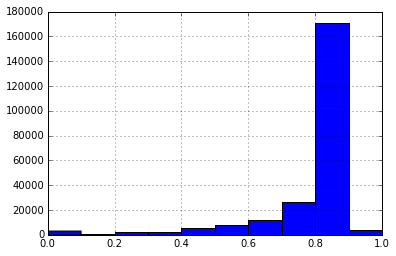

In [112]:
new_df.GaussianNB.hist()


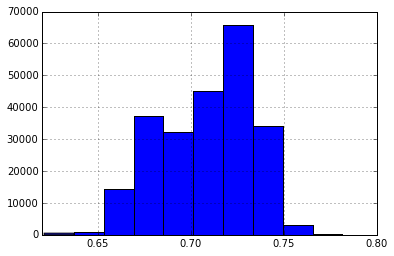

In [113]:
new_df.MultinomialNB.hist()

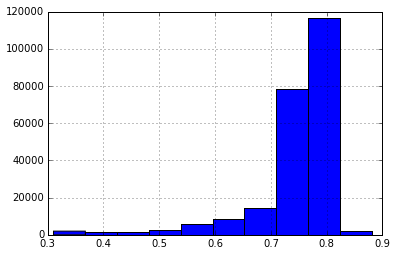

In [146]:
new_df['model_average'] = (new_df.GaussianNB + new_df.MultinomialNB)/2
new_df.model_average.hist()

In [162]:
new_x = new_df['model_average']
new_y = new_df[['RESP']]
new_y = np.ravel(new_y)
new_x = np.ravel(new_x)

print new_x.shape
print new_y.shape
x_train, x_test, y_train, y_test = train_test_split(
    new_x, new_y, test_size=0.25, random_state=7)
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(233687,)
(233687,)
(175265,)
(58422,)
(175265,)
(58422,)


In [161]:
def ensemble_test_model(name, main_model):
    model = main_model
    #model.fit(x_train, y_train)
    precision = np.mean(cross_val_score(main_model, new_x, new_y, scoring = 'precision'))
    accuracy = np.mean(cross_val_score(main_model, new_x, new_y, scoring = 'accuracy'))
    print name, "accuracy", accuracy
    print name, "precision", precision
    print name, "confusion matrix", confusion_matrix(y_test, model.predict(x_test))
ensemble_test_model("GaussianNB", GaussianNB())
ensemble_test_model("LogisticRegression", LogisticRegression())
ensemble_test_model("MultinomialNB", MultinomialNB())

ValueError: Found arrays with inconsistent numbers of samples: [     1 155791]